In [1]:
%matplotlib inline

from matplotlib        import pyplot as plt
from matplotlib.ticker import NullFormatter

/Users/pepijn/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/pepijn/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [14]:
data = {
    'base1': {
        'bleu': [
            ( 0, 12.508 ), ( 2, 14.704 ), ( 4, 17.249 ), ( 6, 18.762 ), ( 8, 20.311 ), ( 9, 19.740 ),
        ],
        'pplx': [
            ( 0, 36.8988 ), ( 1, 34.2411 ), ( 2, 34.6503 ), ( 3, 36.3722 ), ( 4, 37.3043 ),
            ( 5, 40.6900 ), ( 6, 43.1084 ), ( 7, 46.7289 ), ( 8, 49.1755 ), ( 9, 52.5328 ),
        ]
    },
    'base2': {
        'bleu': [
            ( 0, 12.314 ), ( 2, 15.613 ), ( 4, 16.812 ), ( 6, 18.288 ), ( 8, 18.204 ), ( 9, 18.372 ),
        ],
        'pplx': [
            ( 0, 37.3465 ), ( 1, 34.8395 ), ( 2, 35.4873 ), ( 3, 36.2512 ), ( 4, 37.5790 ),
            ( 5, 40.0573 ), ( 6, 42.2125 ), ( 7, 44.7041 ), ( 8, 48.5298 ), ( 9, 51.9253 ),
        ]
    },
    'exp1': {
        'bleu': [
            ( 0, 10.934 ), ( 2, 14.527 ), ( 4, 16.214 ), ( 6, 16.684 ), ( 8, 17.457 ), ( 9, 17.950 ),
        ],
        'pplx': [
            ( 0, 37.3602 ), ( 1, 34.1887 ), ( 2, 35.0137 ), ( 3, 36.2963 ), ( 4, 38.4561 ),
            ( 5, 41.5735 ), ( 6, 45.9352 ), ( 7, 49.0668 ), ( 8, 54.2087 ), ( 9, 59.0749 ),
        ]
    },
    'exp2': {
        'bleu': [
            ( 0, 11.379 ), ( 2, 13.008 ), ( 4, 14.381 ), ( 5, 13.960 ), ( 7, 14.594 ), ( 9, 15.095 ),
        ],
        'pplx': [
            ( 0, 42.8629 ), ( 1, 38.0414 ), ( 2, 38.0865 ), ( 3, 37.8191 ), ( 4, 38.6933 ),
            ( 5, 37.4295 ), ( 6, 38.0471 ), ( 7, 38.4219 ), ( 8, 38.8218 ), ( 9, 38.5303 ),
        ]
    },
    'exp3': {
        'bleu': [
            ( 0, 11.777 ), ( 2, 14.641 ), ( 4, 14.900 ), ( 5, 15.493 ), ( 7, 16.923 ), ( 9, 17.688 ),
        ],
        'pplx': [
            ( 0, 38.1800 ), ( 1, 35.0667 ), ( 2, 35.1439 ), ( 3, 35.2702 ), ( 4, 35.7926 ),
            ( 5, 35.3267 ), ( 6, 35.9495 ), ( 7, 36.7126 ), ( 8, 38.4527 ), ( 9, 39.1957 ),
        ]
    },
}

In [15]:
name = {
    'base0' : 'baseline',
    'base1' : 'baseline (repeat 1)',
    'base2' : 'baseline (repeat 2)',
    'exp1'  : '2-layer encoder, 2-layer decoder',
    'exp2'  : 'dropout (0.5)',
    'exp3'  : 'dropout (0.2)',
    'exp4'  : 'soft attention (bug), dropout (0.2)',
    'exp5'  : 'soft attention (bug)',
    'exp6'  : 'soft attention, dropout (0.2)',
    'exp7'  : 'soft attention'
}

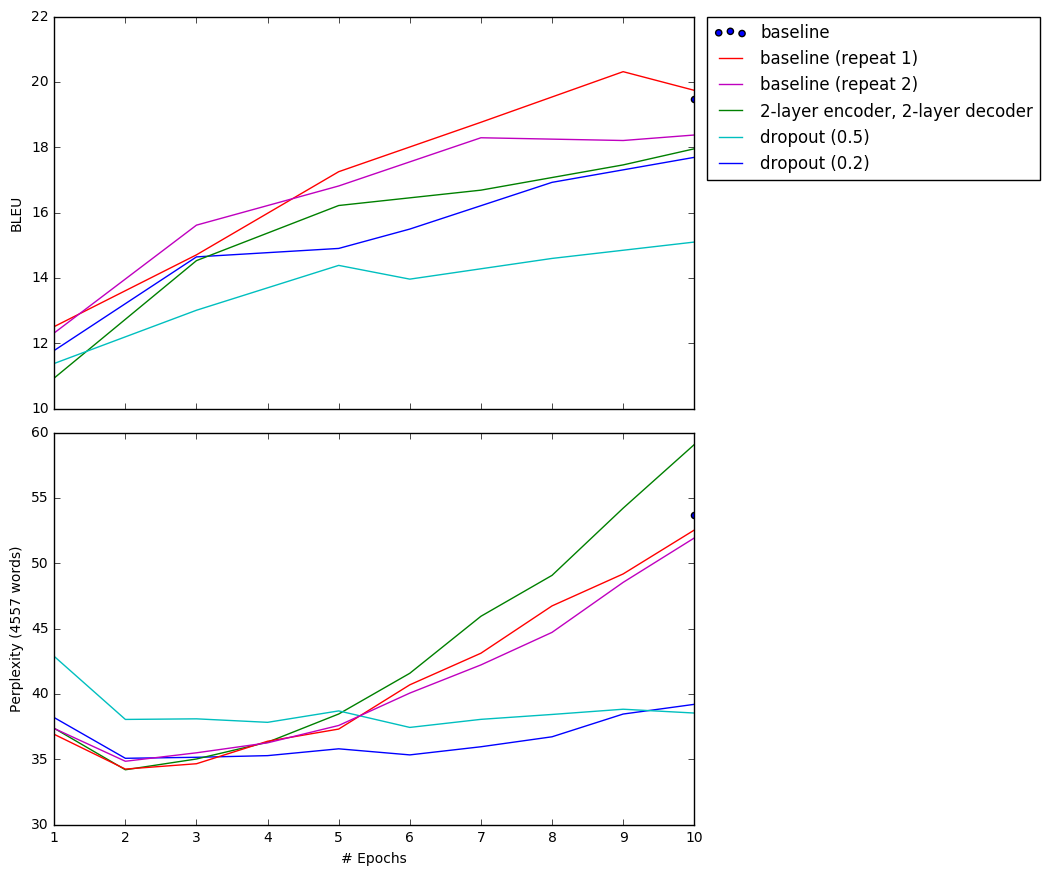

In [16]:
plt.figure(1, figsize=(8,8))
    
bleu = plt.axes([0.0, 0.52, 0.8, 0.49])
pplx = plt.axes([0.0, 0.0 , 0.8, 0.49])

for key, val in data.items():
    epoch, bleu_score = zip(*val['bleu'])
    epoch = [e + 1 for e in epoch]
    bleu.plot(epoch, bleu_score, label=key)
    epoch, pplx_score = zip(*val['pplx'])
    epoch = [e + 1 for e in epoch]
    pplx.plot(epoch, pplx_score, label=key)

def keep_lim(ax, func):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    func(ax)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
keep_lim(bleu, lambda ax: ax.scatter([10], [19.487], label='base0'))
keep_lim(pplx, lambda ax: ax.scatter([10], [53.7228], label='base0'))

nullfmt = NullFormatter()
bleu.xaxis.set_major_formatter(nullfmt)
bleu.set_ylabel('BLEU')
pplx.set_ylabel('Perplexity (4557 words)')
pplx.set_xlabel('# Epochs')

handles, labels = bleu.get_legend_handles_labels()
handles, labels = zip(*map(lambda t: (t[0], name[t[1]]),sorted(zip(handles, labels), key=lambda t: t[1])))
bleu.legend(handles, labels, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.show()